<a href="https://colab.research.google.com/github/benasphy/K-means-iris/blob/main/k-means_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exercise**


1.   Use python to parse the data set I sent you
2.   Preprocess the data.
3. Use sci-kit learn to build a model of k-means clustering. Specify a k and fit your model.
4. Use metrics like silhouette-score from scikit learn to evaluate your model.
5. Write a report on varying the k value and seeing the output.




Importing necessary libraries

In [42]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

# Load the Iris dataset

In [43]:
iris = load_iris()

**Create a Pandas DataFrame from the Iris data**

In [44]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Add a 'flower' column to the DataFrame representing the target variable**

In [45]:
df['flower'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Create a feature matrix X by dropping unnecessary columns**

In [46]:
X = df.drop(['sepal length (cm)', 'sepal width (cm)', 'flower'],axis='columns')

In [32]:
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


**Determine the optimal k value using the elbow method**

In [47]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

**Plot the elbow curve to visualize the optimal k value**

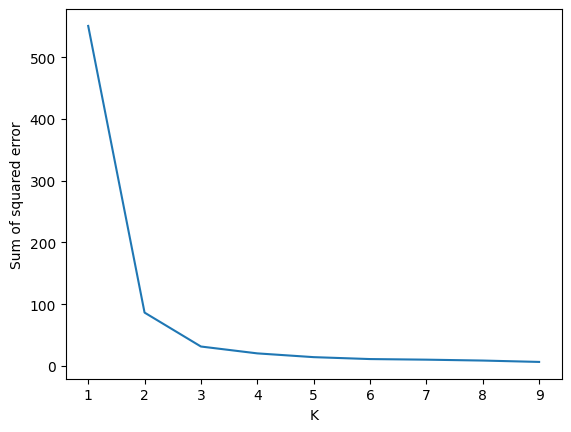

In [48]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

**Apply k-means clustering with the chosen k value (3 in this case)**

In [49]:
km = KMeans(n_clusters=3)
yp = km.fit_predict(X)
yp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

**Add a 'cluster' column to the DataFrame to store cluster assignments**

In [50]:
df['cluster'] = yp
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower,cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0


**Display the unique cluster labels**

In [51]:
df.cluster.unique()

array([0, 2, 1], dtype=int32)

**Create separate DataFrames for each cluster**

In [52]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

**Visualize the clusters using a scatter plot**

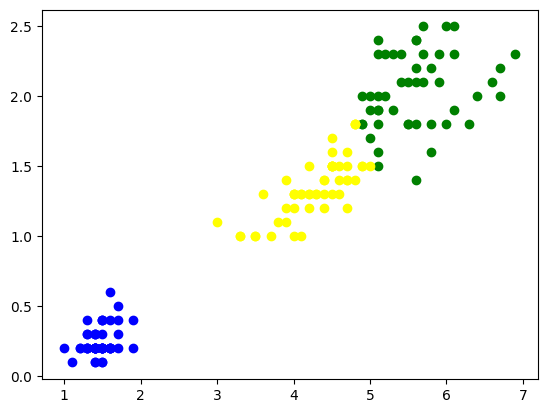

In [53]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='yellow')

**Evaluate the clustering model using accuracy and silhouette score**

In [57]:
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.metrics import silhouette_score

# Get the most frequent target label for each cluster
cluster_mapping = {}
for cluster in df.cluster.unique():
    # Now 'flower' column is available in 'df'
    most_common_target = Counter(df[df.cluster == cluster]['flower']).most_common(1)[0][0]
    cluster_mapping[cluster] = most_common_target

# Relabel the clusters in your DataFrame
df['relabeled_cluster'] = df['cluster'].map(cluster_mapping)

# Calculate accuracy using the relabeled clusters
print(accuracy_score(iris.target, df['relabeled_cluster']))
print(silhouette_score(X, df['relabeled_cluster']))

0.96
0.6604800083974887
